<a href="https://colab.research.google.com/github/afrojaakter/Popular-ML-Algorithms/blob/main/K_NearestNeighbors(K_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K-Nearest Neighbor(KNN)
- One of the simplest ML algorithms based on supervised learning
- KNN assumes similarity between new data and the available data and put the new data into the category that is most similar to the available categories.
- KNN stores all the available data and classifies a new data point based on the similarity. That is, when new data appears KNN easily classifies into a well suited category.

- KNN can mostly used for Classification but it can be used for regression as well.
-KNN is non-parametric algorithm, i.e., it does not make any assumption on underlying data.
- KNN also known as lazy-learner algorithm as it does not learn from the training set immediately instead it stores the dataset and porforms an action at the time of classification. 
-Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.


###Why KNN:
Assume there is a dataset with two categories, A and B. Now we have a new data point x1 and we want to make a decision about which category this point belongs to.To address this type of issue, we need a KNN algorithm. With KNN, we can easily identify the category or class of a particular data. 

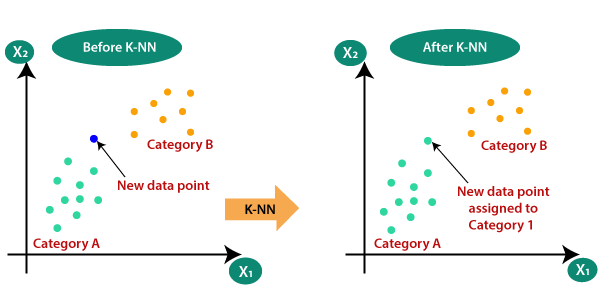

###How K-NN work:
- Step-1:  Select K number of neighbors
- Step-2: Compute the Euclidean distance of K neighbors
- Step-3: Make K nearest neighbors based on the computed Euclidean distance.
- Step-4: Among K neighbors, count the number of data points in each category.
- Step-5: Assign the new data points to the category for which the number of neighbor is maximum.
-Step-6: Model is ready

Suppose we have a new data point and we need to put it in the required category. Consider the below image:

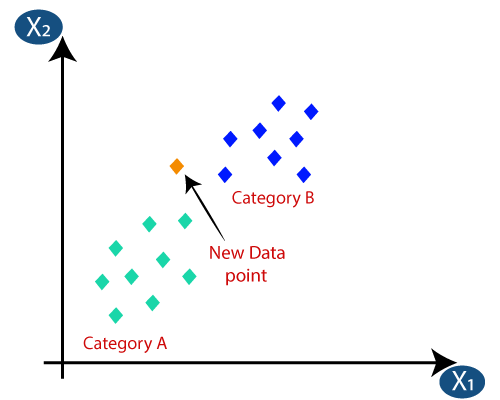

- First, we will choose the number of neighbors, let's say it is, K = 5.
- Now we compute Euclidean distance between two points.

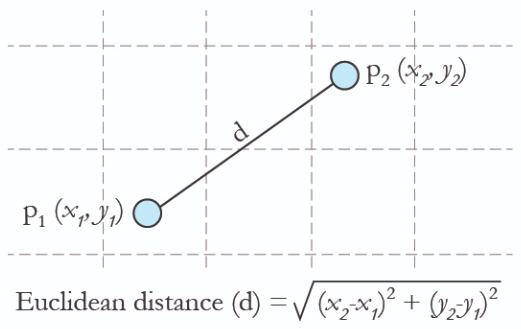

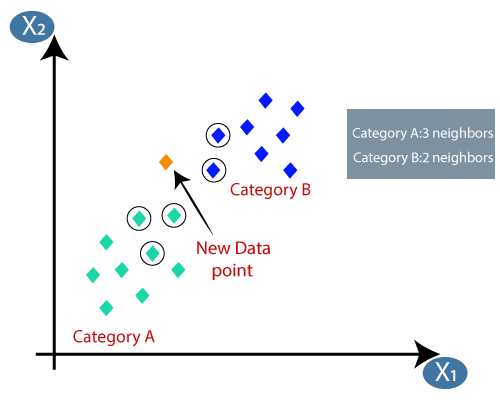

- By computing the Euclidean distance we got the nearest neighbors of the new data point. We see three points are from category A and two points are from the category B. So the new data point must belong to the category A. 

Note: Ways to calculate the distance in KNN:

- Manhattan Method
- Euclidean Method
- Minkowski Method
- mahalanobis distance

I will use Euclidean distance.

###How to select the value of K in KNN:
There are some rule of thumb that we can consider in order to choose the value of K:
- We try KNN with few different values of K and keep the best one
- A very low value e.g. K = 1 or 2 could be very noisy and lead to effects of outliers in the model
-Large value of K are good but it may lead to some difficulties. 

#### Pros of KNN:
- Simple ot impement
- Robust to the noisy training data
- Can be more effective with large tranining data.

#### Cons of KNN:
- Finding the right vlaue of K could be challenging
- High computation cost due to fact that we need to compute the distance between the data points for all the training samples. 


###Implementation of the KNN algorithm from scratch: 
First we will figure out the steps involved in the implementation of K-Nearest Neighbors from Scratch.

Step 1. Figure out an appropriate distance metric to calculate the distance between the data points.

Step 2. Store the distance in an array and sort it according to the ascending order of their distances (preserving the index i.e. can use NumPy argsort method).

Step 3. Select the first K elements in the sorted list.

Step 4. Perform the majority Voting and the class with the maximum number of occurrences will be assigned as the new class for the data point to be classified.

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

dataset = load_iris()
target = dataset.target
train_input = pd.DataFrame(dataset.data, columns = dataset.feature_names)
train_data = pd.concat([train_input, pd.Series(target)], axis = 1)
train_data.rename(columns={0:'class'}, inplace = True)

train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
def train_test_split(dataset, test_size = 0.25):
  n_test =  int(len(dataset)*test_size)
  test_set = dataset.sample(n_test)
  train_set = []

  for idx in dataset.index:
    if idx in test_set.index: continue
    train_set.append(dataset.iloc[idx])
  
  train_set = pd.DataFrame(train_set).astype(float).values.tolist()
  test_set = test_set.astype(float).values.tolist()
  return train_set, test_set

train_set, test_set = train_test_split(train_data)
len(train_set), len(test_set)

(113, 37)

In [10]:
class KNN(object):
  def __init__(self, k):
    self.k = k
  
  @staticmethod
  def EuclideanDistance(u, v):
    """takes two points/vectors as input 
    returns Euclidean distance between them"""

    u, v = np.array(u), np.array(v)
    return np.sqrt(np.sum((u - v)**2))

  def predict(self, train_data, test_data):
    distances = []
    for i in range(len(train_data)):
      dist = self.EuclideanDistance(train_data[i][:-1], test_data)
      distances.append((train_data[i], dist))
    distances.sort(key = lambda x: x[1])

    neighbors = []
    for i in range(self.k):
      neighbors.append(distances[i][0])
    
    classes = {}
    for i in range(len(neighbors)):
      response = neighbors[i][-1]
      if response in classes:
        classes[response] += 1
      else: classes[response] = 1
    
    sorted_classes = sorted(classes.items(), 
                            key = lambda x: x[1], reverse = True)
    return sorted_classes[0][0]
  
  @staticmethod
  def evaluate(y_true, y_pred):
    n_correct =  0
    for act, pred in zip(y_true, y_pred):
      if act == pred:
        n_correct += 1
    return n_correct / len(y_true)

  

In [20]:
for k in range(2, 20, 2):
  knn = KNN(k = k)
  preds = []

  for row in test_set:
    predictions_only = row[:-1]
    prediction = knn.predict(train_set, predictions_only)
    preds.append(prediction)

  actual = np.array(test_set)[:, -1]
  score = knn.evaluate(actual, preds)
  print('k: {}, score: {}'.format(k, score))

k: 2, score: 0.9459459459459459
k: 4, score: 0.9459459459459459
k: 6, score: 0.972972972972973
k: 8, score: 0.972972972972973
k: 10, score: 0.972972972972973
k: 12, score: 0.972972972972973
k: 14, score: 0.972972972972973
k: 16, score: 0.972972972972973
k: 18, score: 0.972972972972973


We see that k = 6 is a resonable choice of neighbors. With k = 6, we get 97.3% accuracy. 

####Reference: 
[JavaTpoint](https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning)
